In [1]:
# Packages required for operations

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams, cycler
from sklearn.linear_model import LinearRegression

%matplotlib inline

c:\users\49171\appdata\local\programs\python\python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\49171\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\users\49171\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Read data

df = pd.read_csv(r"C:\Users\49171\Desktop\Graph-database-Analytics-Neo4j\Query Analysis\query_data.csv")

In [3]:
df.dropna(inplace=True) #drop Null values from data
df.reset_index(inplace=True) #Reset indexes

## PLOTS

### Histogram

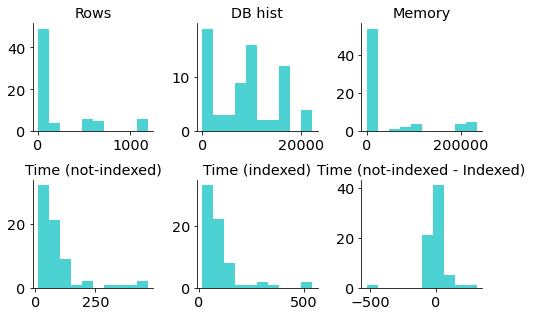

In [43]:
# Parameters for Manual tuning of the graph
rcParams['figure.figsize']= 7,4.5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['lines.linewidth'] = 10
rcParams['axes.prop_cycle'] = cycler(color='c')
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'
rcParams['lines.linestyle'] = '--'

# Plot Histograms

# rows
plt.subplot(2,3,1)
plt.hist(df['Rows'], alpha=0.7)
plt.title('Rows')
# DB-hits
plt.subplot(2,3,2)
plt.hist(df['DB_hits'], alpha=0.7)
plt.title('DB hist')
# Memory
plt.subplot(2,3,3)
plt.hist(df['Memory'], alpha=0.7)
plt.title('Memory')
# Time (not indexed)
plt.subplot(2,3,4)
plt.hist(df['time_not_ind'], alpha=0.7)
plt.title('Time (not-indexed)')
# Time (indexed)
plt.subplot(2,3,5)
plt.hist(df['time_ind'], alpha=0.7)
plt.title('Time (indexed)')
# Time (difference)
plt.subplot(2,3,6)
plt.hist(df['time(not_ind-ind)'], alpha=0.7)
plt.title('Time (not-indexed - Indexed)')

plt.tight_layout()

plt.show()

### Correlation matrix

In [5]:
df1 = df.drop(['Query', 'Cache_memory'], axis=1) #drop unnecessary columns

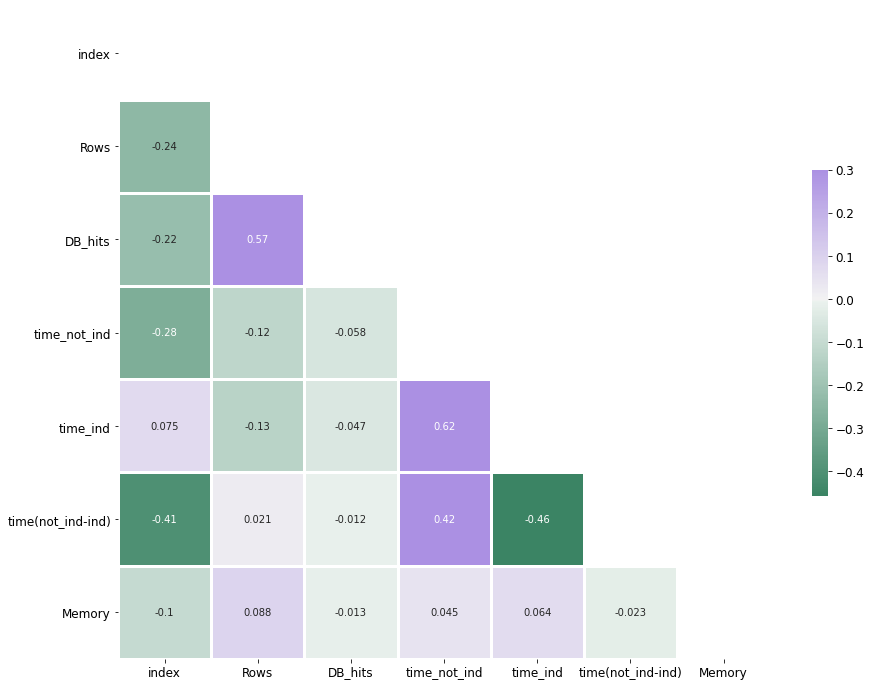

<Figure size 432x288 with 0 Axes>

In [6]:
# Parameters for manual tuning
rcParams['axes.titlesize'] = 'x-large'
rcParams['axes.labelsize'] = 'x-large'
rcParams['xtick.labelsize'] = 'large'
rcParams['ytick.labelsize'] = 'large'

# correlation matrix
corr = df1.corr()

# mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# custom diverging colormap
cmap = sns.diverging_palette(150, 275, as_cmap=True)

# heat map using above defined things
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=2.5, cbar_kws={"shrink": .5}, annot=True )

plt.show()
plt.tight_layout()

### Box Plots

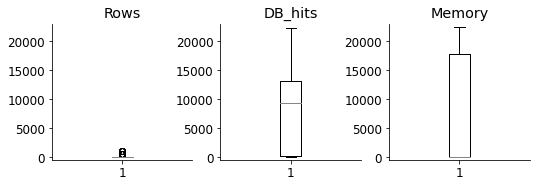

In [31]:
# Parameters for manual tuning
rcParams['axes.titlesize'] = 'x-large'
rcParams['axes.labelsize'] = 'x-large'
rcParams['xtick.labelsize'] = 'large'
rcParams['ytick.labelsize'] = 'large'


# Figure size and Subplot layout
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(4.5, 2.5))
plt.subplots_adjust(left=None, bottom=None, right=1.6, top=None, wspace=None, hspace=None)

# Build box plots

# rows
ax1.boxplot(df.Rows)
ax1.set_title('Rows')
ax1.set_ylim(-400,23000)

# DB-hits
ax2.boxplot(df.DB_hits)
ax2.set_title('DB_hits')
ax2.set_ylim(-400,23000)
# Memory
ax3.boxplot(df.Memory)
ax3.set_title('Memory')
ax3.set_ylim(-400,23000)

# Add horizontal grid lines
ax.yaxis.grid(True)

# Show the plot
plt.show()


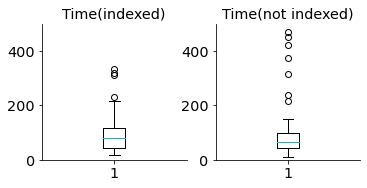

In [44]:
# Figure Size
fig, (ax4, ax5) = plt.subplots(nrows=1, ncols=2, figsize=(3, 2.5))
plt.subplots_adjust(left=None, bottom=None, right=1.6, top=None, wspace=None, hspace=None)

# Build box plots
ax4.boxplot(df.time_ind)
ax4.set_title('Time(indexed)')
ax4.set_ylim(-0,500)

ax5.boxplot(df.time_not_ind)
ax5.set_title('Time(not indexed)')
ax5.set_ylim(-0,500)

# Add horizontal grid lines
ax.yaxis.grid(True)

# show the plot
plt.show()


### Violin Plots

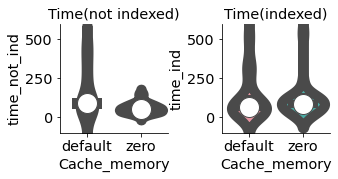

In [47]:
# Create figure with three axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(2, 2))
plt.subplots_adjust(left=None, bottom=None, right=2.0, top=None, wspace=0.5, hspace=None)


# Plot violin plot on axes 1
sns.violinplot(ax = axes[1], data = df, x = "Cache_memory", y = "time_ind")
axes[1].set_title('Time(indexed)')
axes[1].set_ylim(-100,600)


# Plot violin plot on axes 2
sns.violinplot(ax = axes[0],data = df, x = "Cache_memory", y = "time_not_ind")
axes[0].set_title('Time(not indexed)')
axes[0].set_ylim(-100,600)

plt.show()

### Scatter Plots

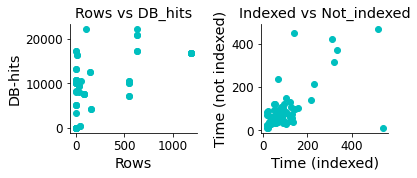

In [49]:
# Parameters
rcParams['axes.titlesize'] = 'x-large'
rcParams['axes.labelsize'] = 'x-large'
rcParams['xtick.labelsize'] = 'large'
rcParams['ytick.labelsize'] = 'large'

# Size of figure 
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(3, 2))
plt.subplots_adjust(left=None, bottom=None, right=1.6, top=None, wspace=0.5, hspace=None)

# Plot on axes 1
ax1.scatter(x = df.Rows, y= df.DB_hits)
ax1.set_xlabel("Rows")
ax1.set_ylabel("DB-hits")
ax1.set_title('Rows vs DB_hits')

# Plot on axes 2
ax2.scatter(x = df.time_ind, y= df.time_not_ind)
ax2.set_xlabel("Time (indexed)")
ax2.set_ylabel("Time (not indexed)")
ax2.set_title('Indexed vs Not_indexed')

plt.show()

## Linear Regression for Comaprison purpose

### (1) y= time_ind

In [11]:
linear_model = LinearRegression() #Linear model object

In [12]:
test_data = df[df['Query'].str.contains('P')]  # derive test data from main data
train_data = df.drop(test_data.index, axis=0)  # derive train data from main data

In [13]:
# drop some unnecessary columns for regression analysis 

test_data_index = test_data.drop(['index', 'Query', 'time(not_ind-ind)','Cache_memory','time_not_ind'], axis=1)
test_data_index.head()


train_data_index = train_data.drop(['index', 'Query', 'time(not_ind-ind)','Cache_memory','time_not_ind'], axis=1)
train_data_index.head()


,Rows,DB_hits,time_ind,Memory
0,545,10521,19,205772
1,31,9443,52,22496
2,3,10674,36,444
3,155,4331,60,86392
4,5,10823,48,2824


In [14]:
# Split variables into Input and Outplut data-sets

x_train_index = train_data_index.drop('time_ind', axis=1)
y_train_index = np.array(train_data_index.time_ind)

x_test_index = test_data_index.drop('time_ind', axis=1)
y_test_index = np.array(test_data_index.time_ind)

In [15]:
lm = linear_model.fit(x_train_index, y_train_index)  #fit the model

In [16]:
y_pred_index = lm.predict(x_test_index) # Predicted results from linear regression

In [17]:
y_test_index

array([ 44,  65,  20,  64,  80, 230,  96, 311, 125,  92,  81, 217,  28,
        24,  41, 120,  54, 541,  95,  90], dtype=int64)

In [18]:
# Collect Real and Predicted values in a dataframe

difference_index = pd.DataFrame({
    'actual': y_test_index ,
    'predicted' : y_pred_index
})


In [19]:
# Declare the winner (Proceedure or General method) and add as a column

procedure_wins = []
for x in range(len(difference_index)):
    
    actual = difference_index.iloc[x][0]
    pred =   difference_index.iloc[x][1]
 
    if pred > actual:
        procedure_wins.append("Procedure")
    else:
        procedure_wins.append("General")


        
difference_index = pd.DataFrame({
    'actual': y_test_index ,
    'predicted' : y_pred_index,
    'winner' : procedure_wins
})
difference_index['winner'].value_counts()        
        

General      11
Procedure     9
Name: winner, dtype: int64

### (2) y= time_not_ind

In [20]:
# derive test and train data from main data

test_data_not_index = test_data.drop(['index', 'Query', 'time(not_ind-ind)','Cache_memory','time_ind'], axis=1)
test_data_not_index.head()


train_data_not_index = train_data.drop(['index', 'Query', 'time(not_ind-ind)','Cache_memory','time_ind'], axis=1)
train_data_not_index.head()


,Rows,DB_hits,time_not_ind,Memory
0,545,10521,86,205772
1,31,9443,121,22496
2,3,10674,64,444
3,155,4331,95,86392
4,5,10823,96,2824


In [21]:
# Split the variables into Input and Output data

x_train_not_index = train_data_not_index.drop('time_not_ind', axis=1)
y_train_not_index = np.array(train_data_not_index.time_not_ind)

x_test_not_index = test_data_not_index.drop('time_not_ind', axis=1)
y_test_not_index = np.array(test_data_not_index.time_not_ind)

In [22]:
lm1 = linear_model.fit(x_train_not_index, y_train_not_index)  #fit the model to train data

In [23]:
y_pred_not_index = lm1.predict(x_test_not_index) # Predicted result from linear regression

In [24]:
# Collect the actual and predicted data points

difference_not_index = pd.DataFrame({
    'actual': y_test_not_index ,
    'predicted' : y_pred_not_index
})

In [25]:
# Declare the winner (Proceedure or General method) and add as a column 

procedure_wins_n = []
for x in range(len(difference_index)):
    
    actual = difference_not_index.iloc[x][0]
    pred =   difference_not_index.iloc[x][1]
 
    if pred > actual:
        procedure_wins_n.append("Procedure")
    else:
        procedure_wins_n.append("General")
        
difference_not_index = pd.DataFrame({
    'actual': y_test_not_index ,
    'predicted' : y_pred_not_index,
    'winner' : procedure_wins_n
})
difference_not_index['winner'].value_counts()

Procedure    14
General       6
Name: winner, dtype: int64